In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

# ------------------------------------------------------------------------------
# 1.  DIRECTORIOS
# ------------------------------------------------------------------------------
base_path    = "../../../assets/tesis/neoliberalismo/serie_completa"
dir_completa = os.path.join(base_path, "componentes_pib")
os.makedirs(dir_completa, exist_ok=True)

# ------------------------------------------------------------------------------
# 2.  ESTILO GRÁFICO PROFESIONAL
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family'    : 'serif',
    'font.size'      : 12,
    'axes.titlesize' : 16,
    'axes.labelsize' : 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'grid.linestyle' : '--',
    'lines.linewidth': 2,
    'figure.dpi'     : 150,
    'savefig.bbox'   : 'tight'
})

# ------------------------------------------------------------------------------
# 3.  CARGA DE DATOS
# ------------------------------------------------------------------------------
conn = sqlite3.connect('../../../db/proyectomacro.db')
df_pib = pd.read_sql_query("SELECT * FROM pib_real_gasto", conn)
conn.close()

df_pib.set_index('año', inplace=True)
df_pib = df_pib.loc[1982:2002]  # periodo 2 completo
df_pib /= 1000                  # opcional: escalar a millones

# Componentes a graficar (excluimos total si existiera)
componentes = [
    'gastos_consumo',
    'formacion_capital',
    'exportacion_bienes_servicios',
    'importacion_bienes',
    'consumo_privado',
    'consumo_publico'
]

# ------------------------------------------------------------------------------
# 4.  FUNCIONES AUXILIARES PARA ESTADÍSTICAS
# ------------------------------------------------------------------------------
def cuadro_estadisticas(serie):
    mean = serie.loc[1982:1986].mean()
    delta= (serie.loc[1986] - serie.loc[1982]) / serie.loc[1982] * 100
    return (f"Crisis (1982‑1985)\nMean: {mean:.2f}\n"
            f"Δ85/82: {delta:.1f}%")

def cuadro_estadisticas_post(serie):
    mean = serie.loc[1986:2002].mean()
    delta= (serie.loc[2002] - serie.loc[1986]) / serie.loc[1986] * 100
    return (f"Post (1986‑2002)\nMean: {mean:.2f}\n"
            f"Δ02/86: {delta:.1f}%")

# Mapa de offsets puntuales (si lo deseas ajustar por componente/año)
# Offset de anotaciones por componente y año
annotation_offsets = {
    'gastos_consumo': {
        1982: (0, 400),
        1986: (0, 300),
        2002: (0, 500),
    },
    'formacion_capital': {
        1982: (0, 70),
        1986: (0, -150),
        2002: (0, 100),
    },
    'exportacion_bienes_servicios': {
        1982: (0, 100),
        1986: (0, 100),
        2002: (0, 50),
    },
    'importacion_bienes': {
        1982: (0, 200),
        1986: (0, -340),
        2002: (0, 75),
    },
    'consumo_privado': {
        1982: (0, 200),
        1986: (0, 150),
        2002: (0, -400),
    },
    'consumo_publico': {
        1982: (0, 50),
        1986: (0,150),
        2002: (0, -150),
    },
}

# ------------------------------------------------------------------------------
# 5.  CREACIÓN DE GRÁFICAS
# ------------------------------------------------------------------------------
for col in componentes:
    serie = df_pib[col]
    fig, ax = plt.subplots(figsize=(10, 6))

    # Segmentos: crisis vs post‑crisis
    ax.plot(serie.loc[1982:1986], color='crimson', label='Crisis (82‑85)')
    ax.plot(serie.loc[1986:2002], color='#1f77b4', label='Post (86‑02)')

    # Línea divisoria en 1986
    ax.axvline(x=1986, color='gray', linestyle='--', linewidth=1, label='Inicio post‑crisis')

    # Anotaciones en años clave: 1982, 1986, 2002
    for yr in (1982, 1986, 2002):
        val = serie.loc[yr]
        # uso de offsets si existen, o fallback a 5% del valor
        dx, dy = annotation_offsets.get(col, {}).get(yr, (0, val * 0.05))
        ax.annotate(f"{val:.2f}",
                    xy=(yr, val),
                    xytext=(yr + dx, val + dy),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    ha='center', fontsize=11)

    # Cuadros de estadísticas
    ax.text(1983.5, serie.max() * 0.85, cuadro_estadisticas(serie),
            fontsize=9, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
    ax.text(1989, serie.max() * 0.85, cuadro_estadisticas_post(serie),
            fontsize=9, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    # Etiquetas y leyenda
    ax.set_title(f"{col.replace('_',' ').title()} – 1982‑2002", fontweight='bold')
    ax.set_xlabel("Año")
    ax.set_ylabel("Millones (base 1990)")
    ax.legend()
    plt.xticks(df_pib.index[::2], rotation=45)

    # Guardar
    plt.tight_layout()
    plt.savefig(os.path.join(dir_completa, f"{col}.png"))
    plt.close(fig)

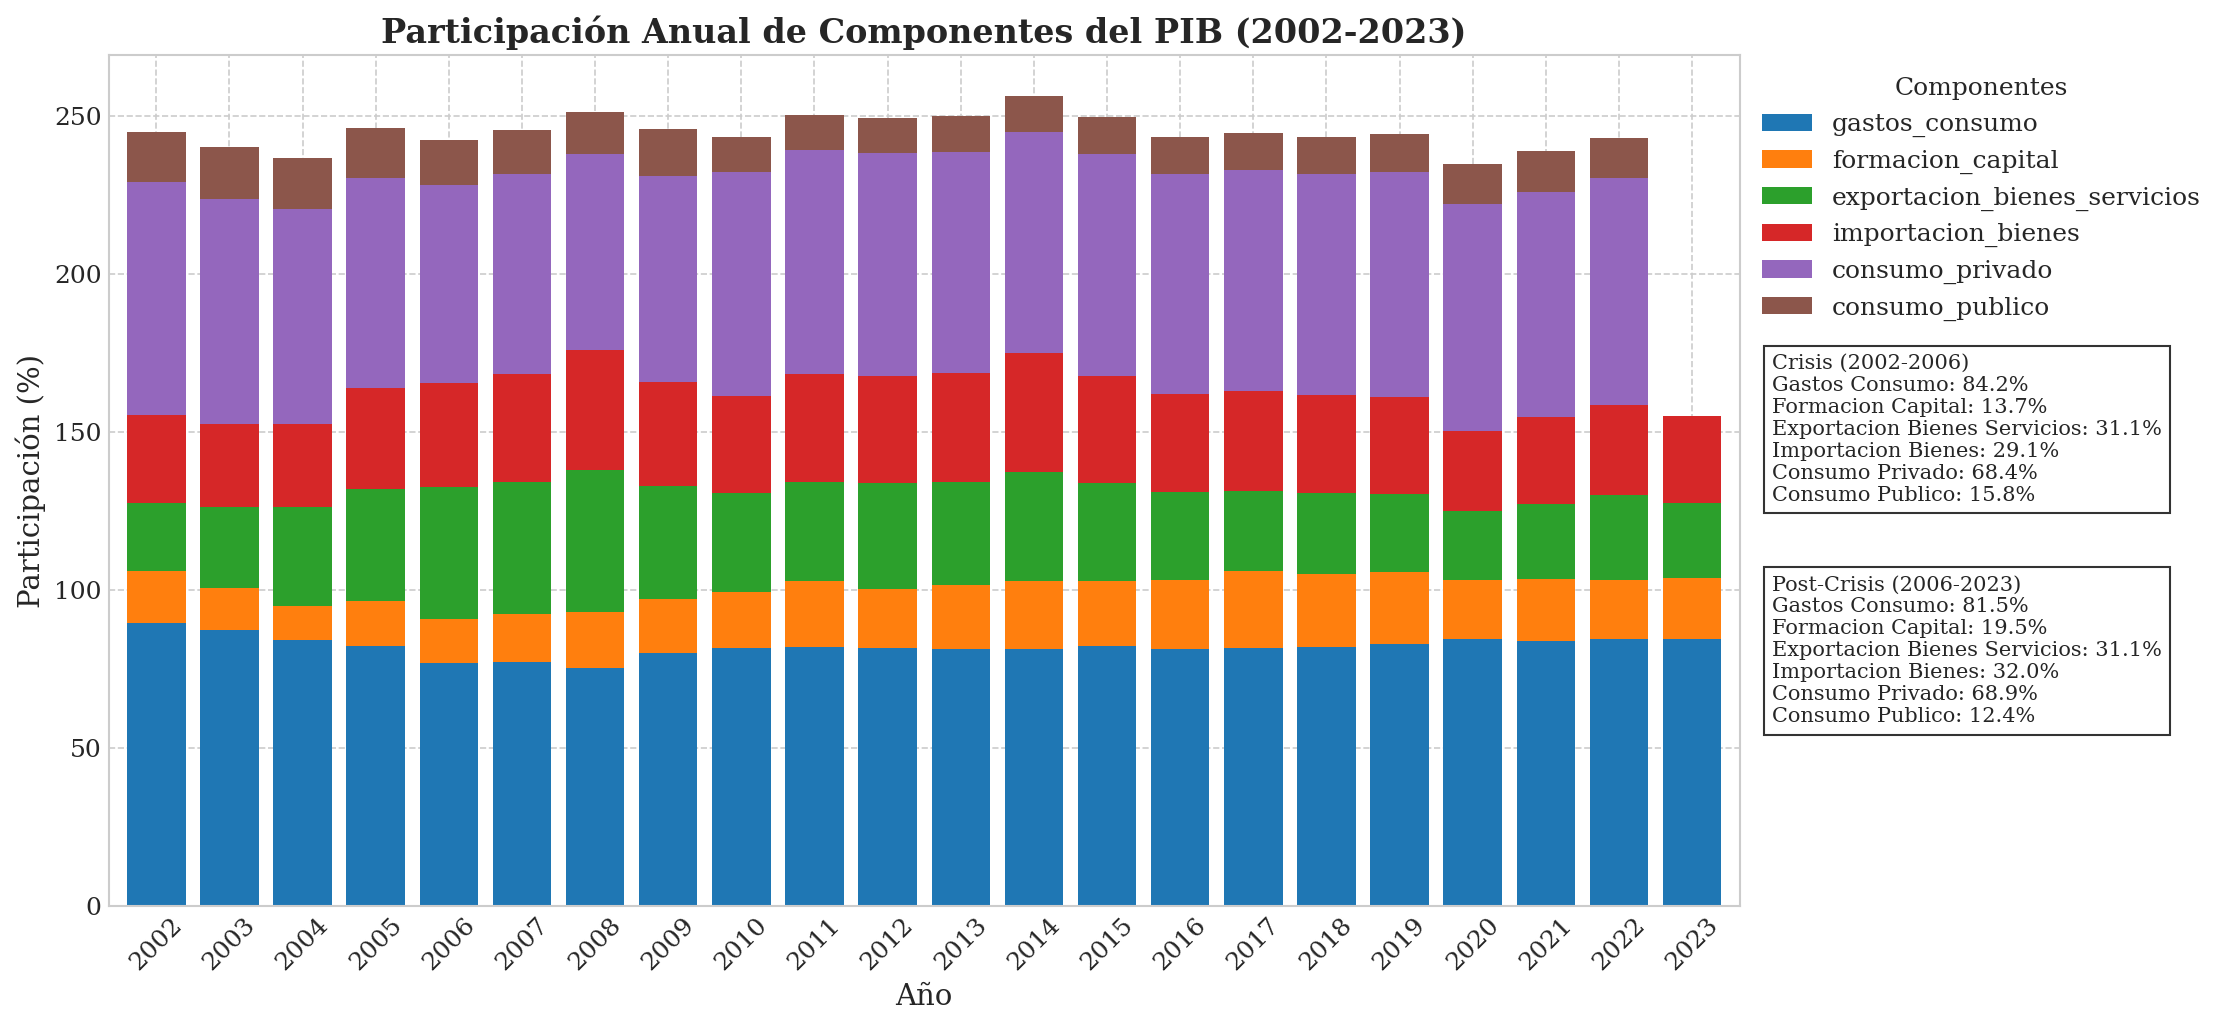

In [4]:
# ── 1. Parámetros y rutas ─────────────────────────────────────────────────────
CRISIS_YEARS = slice(2002, 2006)   # 1952‑1955 inclusive
POST_YEARS   = slice(2006, 2023)   # 1956‑1982 inclusive
OUTPUT_DIR   = "../../../assets/tesis/neodesarollismo/serie_completa"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ── 2. Estilo profesional ─────────────────────────────────────────────────────
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family'    : 'serif',
    'font.size'      : 12,
    'axes.titlesize' : 16,
    'axes.labelsize' : 14,
    'grid.linestyle' : '--',
    'lines.linewidth': 2,
    'figure.dpi'     : 150,
    'savefig.bbox'   : 'tight'
})

# ── 3. Carga de datos ──────────────────────────────────────────────────────────
with sqlite3.connect("../../../db/proyectomacro.db") as conn:
    df_pib = pd.read_sql_query("SELECT * FROM PIB_Real_Gasto", conn, index_col="año")

df = df_pib.loc[2002:2023].copy()
# ── 4. Preparar participaciones (%) ───────────────────────────────────────────
componentes = [
    'gastos_consumo',
    'formacion_capital',
    'exportacion_bienes_servicios',
    'importacion_bienes',
    'consumo_privado',
    'consumo_publico'
]
pct = df[componentes].div(df["pib_real_base_1990"], axis=0) * 100

# ── 5. Estadísticas promedio por periodo ──────────────────────────────────────
avg_crisis = pct.loc[CRISIS_YEARS].mean()
avg_post   = pct.loc[POST_YEARS].mean()

# ── 6. Gráfico stacked‑bar por año ────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(15, 7))
pct.plot(kind="bar", stacked=True, ax=ax, width=0.8)

ax.set_ylabel("Participación (%)")
ax.set_xlabel("Año")
ax.set_title("Participación Anual de Componentes del PIB (2002‑2023)", fontweight="bold")
ax.legend(loc="upper left", bbox_to_anchor=(1,1), title="Componentes")
plt.xticks(rotation=45)

# ── 7. Cuadros con promedios de crisis y post‑crisis ──────────────────────────
stats_crisis = "\n".join(
    f"{comp.replace('_',' ').title()}: {avg_crisis[comp]:.1f}%"
    for comp in componentes
)
stats_post = "\n".join(
    f"{comp.replace('_',' ').title()}: {avg_post[comp]:.1f}%"
    for comp in componentes
)

# Crisis box (82‑86)
ax.text(1.02, 0.56, "Crisis (2002‑2006)\n" + stats_crisis,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

# Post‑crisis box (86‑02)
ax.text(1.02, 0.30, "Post‑Crisis (2006‑2023)\n" + stats_post,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

# ── 8. Guardar y mostrar ─────────────────────────────────────────────────────
plt.tight_layout()

plt.show()